In [1]:
library(tidyverse)
library(flowCore)
library(flowViz)
library(ggcyto)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice
Loading required package: ncdfFlow
Loading required package: RcppArmadillo
Loading required package: BH
Loading required package: flowWorkspace


In [2]:
fcdir  <- "/media/clint/Data/GitRepo/BIOS822_FinalProj/data_test"
fclist <- dir(fcdir)

# Read in data

In [3]:
#fs <- read.FCS(file.path(fcdir, "100715.fcs"), transformation = FALSE)
fs <- read.flowSet(file.path(fcdir, fclist), transformation = FALSE)
print(class(fs))
print("=========")
print(length(fs))
print("=========")
print(fs)

[1] "flowSet"
attr(,"package")
[1] "flowCore"
[1] "========="
[1] 2
[1] "========="
A flowSet with 2 experiments.

  column names:
  FSC-A FSC-H SSC-A B515-A R780-A R710-A R660-A V800-A V655-A V585-A V450-A G780-A G710-A G660-A G610-A G560-A


In [4]:
fs1 <- fs[[1]]
print(class(fs1))
print("=========")
print(length(fs1))
print("=========")
print(fs1)

[1] "flowFrame"
attr(,"package")
[1] "flowCore"
[1] "========="
[1] 1
[1] "========="
flowFrame object '100715.fcs'
with 65016 cells and 16 observables:
       name         desc  range     minRange maxRange
$P1   FSC-A         <NA> 262207 23406.000000   262206
$P2   FSC-H         <NA> 262207 27008.500000   262206
$P3   SSC-A         <NA> 261588    -8.014621   261587
$P4  B515-A         KI67 261588   -67.282539   261587
$P5  R780-A          CD3 261588   -67.119034   261587
$P6  R710-A         CD28 261588   -44.558552   261587
$P7  R660-A       CD45RO 261588   -79.819801   261587
$P8  V800-A          CD8 261588  -110.409325   261587
$P9  V655-A          CD4 261588   -66.276711   261587
$P10 V585-A         CD57 261588  -110.472748   261587
$P11 V450-A VIVID / CD14 261588   -28.876564   261587
$P12 G780-A         CCR5 261588  -110.527817   261587
$P13 G710-A         CD19 261588   -89.503387   261587
$P14 G660-A         CD27 261588   -51.957710   261587
$P15 G610-A         CCR7 261588   -61

```
events <- exprs(fs1)
print(dim(events))
print("==================")
head(events, 3)

spill <- fs@description$'SPILL'
print(dim(spill))
print("==================")
head(spill, 3)

colnames(spill)

comp_fs <- compensate(fs, spill)
comp_events <- exprs(comp_fs)

trans_asinh <- transform(fs, transformList(colnames(fs)[4:16], asinh))
print(splom(trans_asinh))
autoplot(fstrans_asinh, "B515-A", "R780-A")
```

# Get the raw data matrix and spill matrix

In [5]:
events <- exprs(fs1)
print(dim(events))
print("==================")
head(events, 3)

[1] 65016    16
[1] "=================="


FSC-A,FSC-H,SSC-A,B515-A,R780-A,R710-A,R660-A,V800-A,V655-A,V585-A,V450-A,G780-A,G710-A,G660-A,G610-A,G560-A
27700.75,27291.75,177.5258,1984.485,625.0796,1232.1008,748.5101,1553.0295,1350.2565,3175.717,2338.104,2286.1709,1758.4244,2550.914,1862.9843,1972.4854
41264.25,39764.25,320.1230,3639.620,539.7032,1433.3112,1470.2659,2217.6750,2305.3516,5683.995,4767.498,2617.9441,2063.0974,3401.507,2471.2236,2268.8318
65054.75,57606.25,203.0161,2191.861,198.6541,726.9798,766.2198,802.2521,809.9579,1763.534,2870.204,721.3581,750.2025,1156.660,879.6395,802.7821


In [6]:
spill <- fs1@description$'SPILL'
print(dim(spill))
print("==================")
head(spill, 3)

[1] 13 13
[1] "=================="


B515-A,R780-A,R710-A,R660-A,V800-A,V655-A,V585-A,V450-A,G780-A,G710-A,G660-A,G610-A,G560-A
1,0.0000000,0.00000000,8.841571e-05,0.000249456,0.0006451592,0.007198402,0,0.0000000,0.0001313262,6.652512e-05,0.000581584,0.002520173
0,1.0000000,0.07118759,1.484480e-01,0.338903191,0.0097166031,0.000000000,0,0.3013802,0.0074776111,1.235431e-02,0.000000000,0.000000000
0,0.3314049,1.00000000,6.196476e-02,0.120978670,0.0040525548,0.000000000,0,0.1091165,0.1003138332,5.831773e-03,0.000000000,0.000000000


# Compensation and transformation

In [7]:
comp_fs <- compensate(fs1, spill)
comp_events <- exprs(comp_fs)

In [9]:
trans_asinh <- transform(comp_fs, transformList(colnames(fs)[4:16], asinh))

# Visualization

Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider in

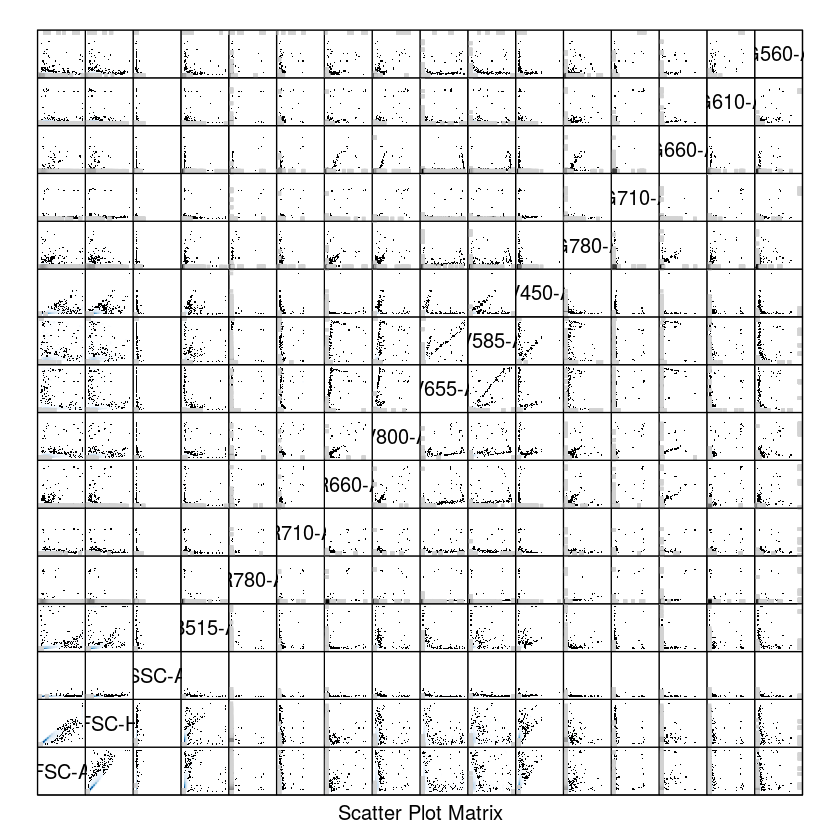

In [11]:
print(splom(comp_fs))

Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, gridsize = nbin, bandwidth = bandwidth, :
“Binning grid too coarse for current (small) bandwidth: consider in

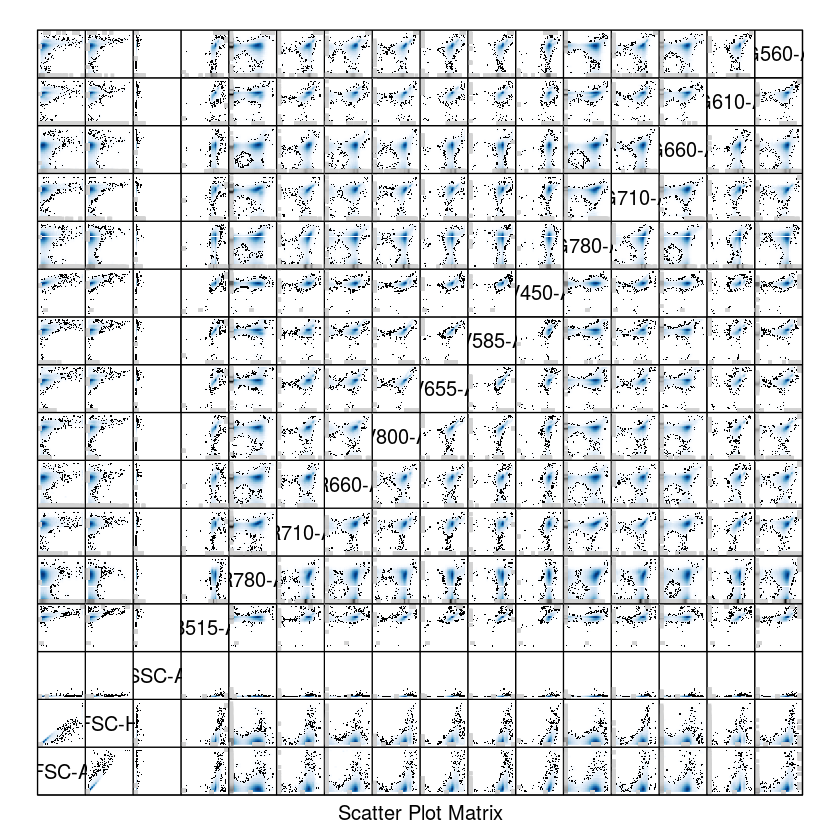

In [10]:
print(splom(trans_asinh))